# Интернет-магазин компьютерных игр

Интернет-магазин продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

*Примечания:*

- На дворе декабрь 2016 г., и нашей команде предстоит спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. В нашем распоряжении данные до 2016 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**: провести исследовательский анализ данных и дать рекомендации по выбору направления рекламной кампании.

## Знакомство с данными

In [1]:
# импортируем необходимые для исследования библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

In [2]:
# присваиваем имя переменной
dt = pd.read_csv('/datasets/games.csv')
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датафрейм состоит из 11 столбцов и содержит информацию о 16715 выпущенных видеоиграх.

Описание данных:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

При первичном знакомстве с данными обнаруженны следующие проблемы:
- пропущенные значения присутствуют в 6 из 11 столбцах: название игры, год выпуска, жанр игры, оценка критиков, оценка пользователей, рейтинг от организации ESRB;
- в наименованиях столбцов нарушено правило "хорошего стиля" (регистр);
- вещественный формат года выпуска, текстовый формат оценки пользователей;

На этапе предобработки, для корректного анализа, нам предстоит предстоит исправить все недочеты в датафрейме, которые будут препятствовать корректному анализу.

## Предобработка данных

### Стиль заголовков 

In [3]:
# для приведения к строчному регистру названия столбцов, применим метод str.lower()
# выведем отредактированный список заголовков
dt.columns = dt.columns.str.lower()
dt.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [4]:
# избавимся от строк с пропущенными значениями в столбце "название игры" и "год выпуска",
# их удаление не повлияет на дальнейший анализ, т.к. они составляют несущественный процент наблюдений.
dt.dropna(subset = ['name'],inplace = True)
dt.dropna(subset = ['year_of_release'],inplace = True)

In [5]:
# заменим пропуски в столбце rating, для того,
# чтобы - игры без возрастного рейтинга отобразились в портретах пользователей
dt.loc[dt['rating'].isna(), 'rating'] = 'undefined'

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


После обработки пропусков датафрейм содержит 16444 наблюдений.

Столбцы "оценка критиков" и "оценка пользователей" оставляем как есть, пропуски не заменяем, т.к. любое заполнение пропусков исказит результаты корреляционного анализа и стат-тестов.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Все верно, молодец.

</div>

### Изменение типов данных

In [7]:
# переведем год выпуска в формат datetime, а оценку пользователей в float
dt['year_of_release'] = pd.to_datetime(dt['year_of_release'], format = '%Y')
dt['user_score'] = pd.to_numeric(dt['user_score'], errors='coerce')
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           16444 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах

In [8]:
# создадим столбец в который включим суммарные продажи во всех регионах
dt['total_sales'] = dt[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
dt.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


Предобработка данных завершена, датафрейм готов к исследовательскому анализу.

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

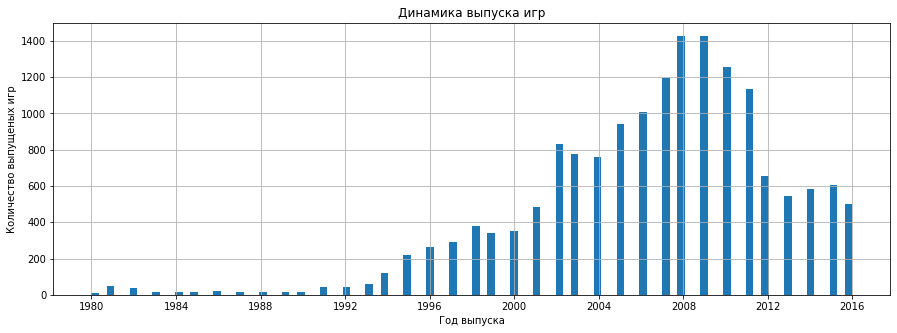

In [9]:
# построим столбчатую диаграмму отображающую количество выпущенных игр за каждый год
dt['year_of_release'].hist(bins = 100, figsize=(15,5))
plt.title('Динамика выпуска игр')
plt.ylabel('Количество выпущеных игр')
plt.xlabel('Год выпуска')
plt.show()

Судя по графику рост индустрии видеоигр берет свое начало в 1994 году. Все игры выпускаемые до этого года, для анализа не важны, их можно смело отсечь. Пик выпуска игр приходится на период с 2008 по 2009 год.

In [10]:
# создадим новую таблицу по значимому для анализа периоду, при помощи метода .query
dt_new = dt.query('year_of_release >= 1994')

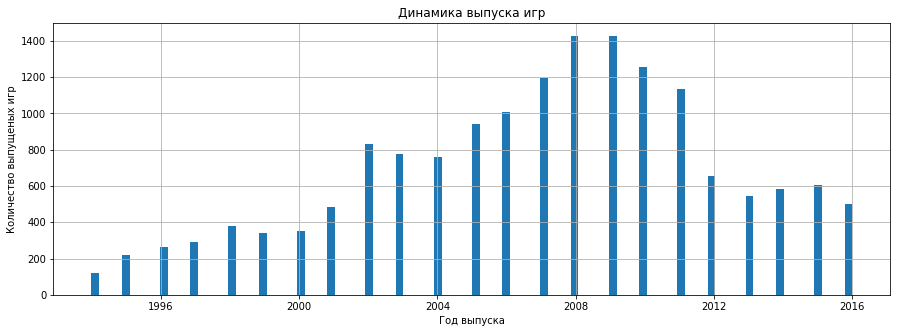

In [11]:
# построим столбчатую диаграмму отображающую количество выпущенных игр за каждый год по новому датафрейму
dt_new['year_of_release'].hist(bins = 100, figsize=(15,5))
plt.title('Динамика выпуска игр')
plt.ylabel('Количество выпущеных игр')
plt.xlabel('Год выпуска')
plt.show()

### Как менялись продажи по платформам

In [12]:
# создадим сводную таблицу с суммарными продажами по
# платформам, установим значимы порог в продажах - 5 млн. копий
top_platforms = (
    dt.pivot_table(
        index=['platform'],
        values='total_sales',
        aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
top_platforms = top_platforms.query('total_sales > 5')
top_platforms.reset_index().head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [13]:
# сделаем срез из предыдущей таблицы, оставим топ 10 платформ по продажам
top_platforms = top_platforms.query('total_sales > 256')
top_platforms.reset_index()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


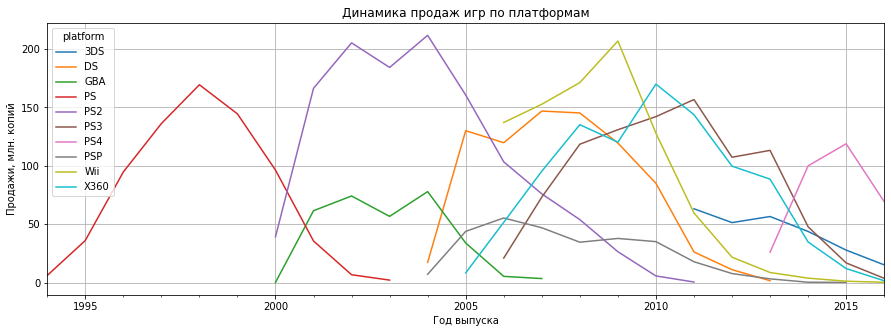

In [14]:
# построим линейную диаграмму, отображающую динамику продаж игр по интересующим нас платформам
dt_new.query('platform in ["PS2","X360","PS3","Wii","DS","PS","PS4","GBA","PSP","3DS"]').pivot_table(
    index='year_of_release', columns = 'platform', 
    values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.title('Динамика продаж игр по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год выпуска')
plt.show()

In [15]:
# установим размер минимально значимых продаж в миллионах
min_sales = 5

# суммарные продажи в год выше порога
report = (
    dt_new.groupby(['platform', 'year_of_release'])
    .agg({'total_sales': 'sum'})
    .query('total_sales > @min_sales')
    .reset_index()
)
# среднее число лет жизни выше порога продаж в 5 млн.
report.groupby('platform').agg({'year_of_release': 'nunique'}).mean()

year_of_release    6.590909
dtype: float64

Среднее время жизни платформ 6.59 года

### Актуальный период исследования

За актуальный период исследования возьмем 3 года. Данный период позволит нам построить прогноз на 2017 год.

In [16]:
# выполним срез по дате (за последние 3 года)
actual_platforms = dt.query('year_of_release > 2013')
actual_platforms_total_sales = (
    actual_platforms.pivot_table(
        index=['platform'],
        values='total_sales',
        aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
actual_platforms_total_sales

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [17]:
actual_platforms = dt.query('year_of_release > 2013')
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98


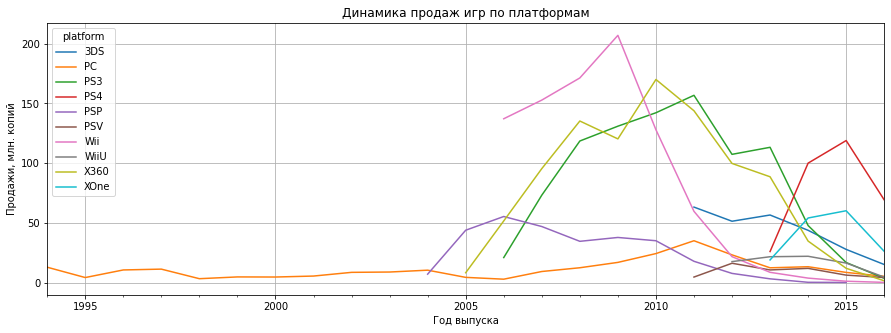

In [18]:
# построим линейную диаграмму по актуальным платформам
# создадим переменную с интересующими нас платформами и передадим ей список платформ
actual_platform = ["PS4","XOne","3DS","PS3","X360","WiiU","PC","PSV","Wii","PSP"]
(
    dt_new.query('platform in @actual_platform')
    .pivot_table(
        index='year_of_release',
        columns = 'platform',
        values='total_sales',
        aggfunc='sum')
    .plot(grid=True, figsize=(15, 5))
)
plt.title('Динамика продаж игр по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год выпуска')
plt.show()

На основании графика мы не видим платформ которые находяться в восходящем тренде за актуальный период исследования. Но можно отметить 3 платформы с наибольшими продажами и запасом по средней продолжительности жизни платформ, на отчетный год: "PS4", "XOne", "3DS". Также следует отметить и выделить игровую платформу "PC", она уникальна тем, что за весь исследуемый период выпуск игр, на данной платформе, не прерывался, хоть ее продажи никогда и небыли в топе. Наиболее потенциальные из выделенных платформ "PS4" и "XOne", т.к. они еще недостигли и половины от средней продолжительности жизни платформ, а также лучше всех продаются на 2016 год.

Также мы решили убрать из перечния платформ, попадающих в 3-х летний срок, которые перестали выпускаться на момент отчетного года, это: "PS3" и "PSP".

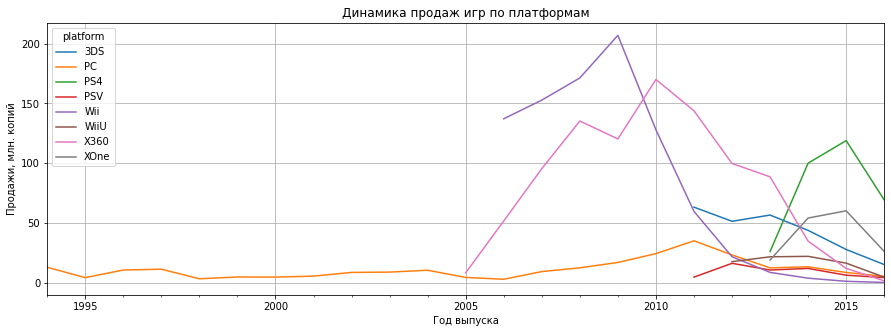

In [19]:
# удалим платформы, которые перестали выпускаться за последние 3 года
# выведем обновленную линейную диаграмму
actual_platform = ["PS4","XOne","3DS","X360","WiiU","PC","PSV","Wii"]
actual_platforms = actual_platforms.query('platform in @actual_platform')
(
    dt_new.query('platform in @actual_platform')
    .pivot_table(
        index='year_of_release',
        columns = 'platform',
        values='total_sales',
        aggfunc='sum')
    .plot(grid=True, figsize=(15, 5))
)
plt.title('Динамика продаж игр по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Год выпуска')
plt.show()

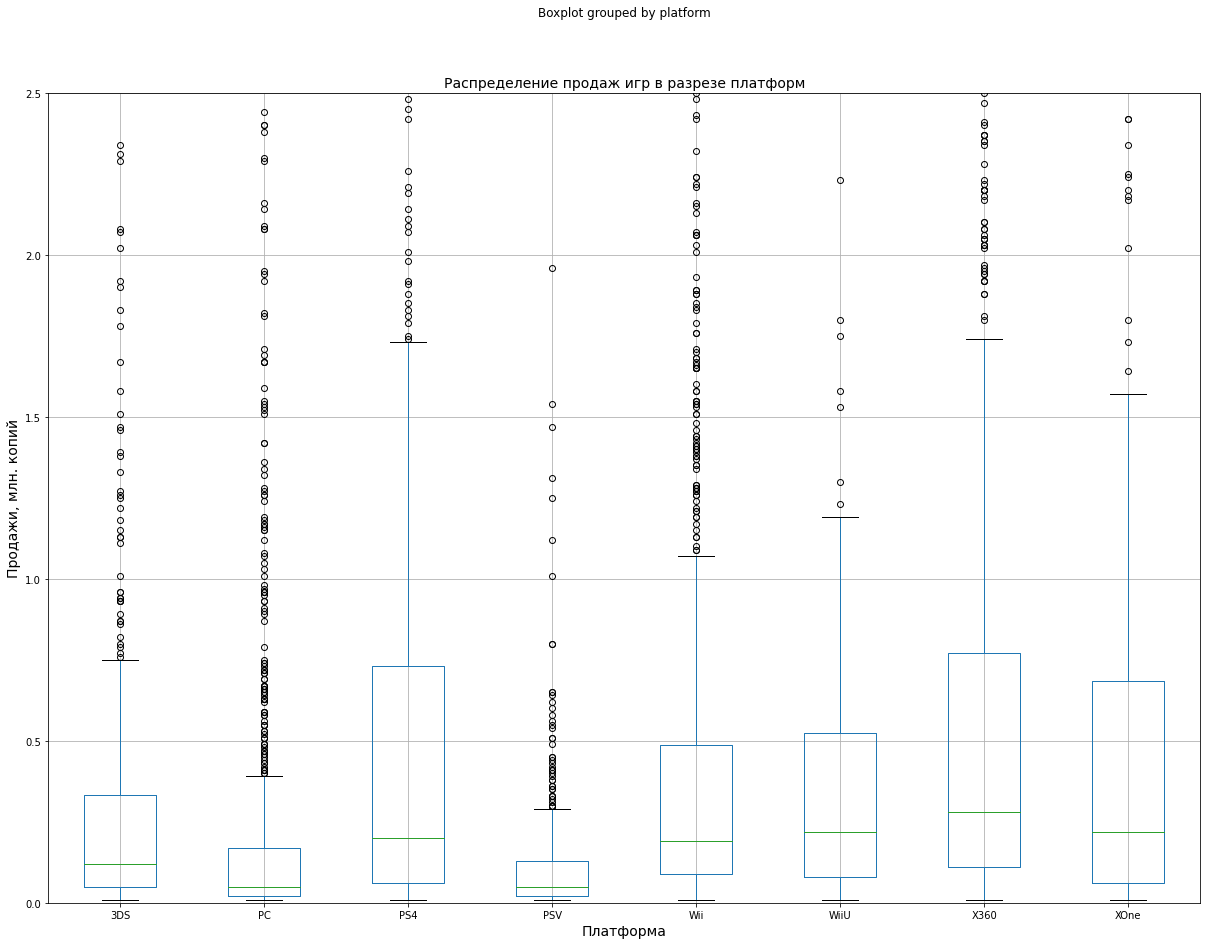

In [20]:
# построим диаграмму "ящик с усами" по прадажам игр в разрезе актуальных платформ
dt_platforms = dt.query('platform in @actual_platform')
dt_platforms.boxplot(
    column='total_sales',
    by='platform',
    figsize=(20,15)
)
plt.ylim(0,10)
plt.title('Распределение продаж игр в разрезе платформ', size=14)
plt.ylabel('Продажи, млн. копий', size=14)
plt.xlabel('Платформа', size=14)
plt.ylim(0,2.5)
plt.show()

Плтаформы с наибольшими медианными продажами: "X360", "XOne", "WiiU", "PS4", "Wii" и "3DS".

Для выбора наиболее популярных платформ, исключим те, которые на момент отчетного года, по объему продаж, сошли на нет: "X360" и "Wii".

Актуальный список наиболее популярных платформ: "XOne", "WiiU", "PS4", "3DS" и "PC".

### Влияние оценок пользователей и критиков на продажи популярных платформ

Влияние отзывов на продажи, для платформы XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


Влияние отзывов на продажи, для платформы WiiU


,total_sales,user_score,critic_score
total_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


Влияние отзывов на продажи, для платформы PS4


,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Влияние отзывов на продажи, для платформы 3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.222078,0.348740
user_score,0.222078,1.000000,0.745222
critic_score,0.348740,0.745222,1.000000


Влияние отзывов на продажи, для платформы PC


,total_sales,user_score,critic_score
total_sales,1.000000,0.011478,0.257359
user_score,0.011478,1.000000,0.553778
critic_score,0.257359,0.553778,1.000000


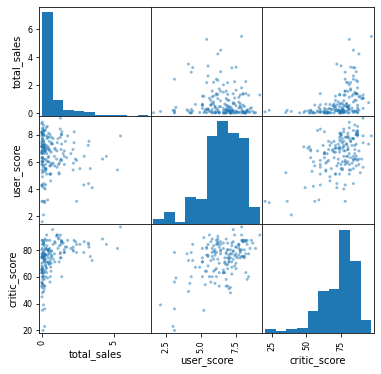

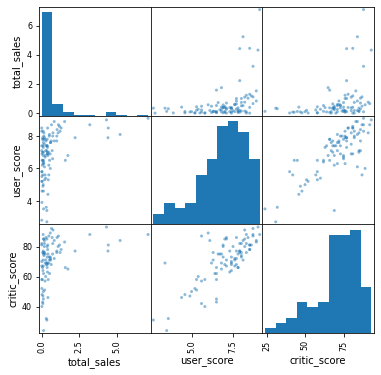

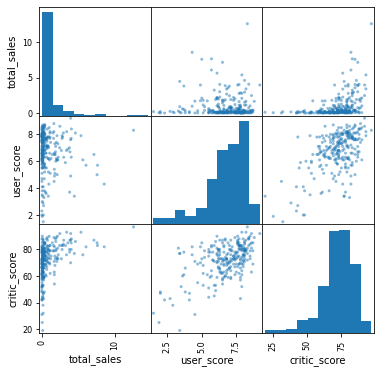

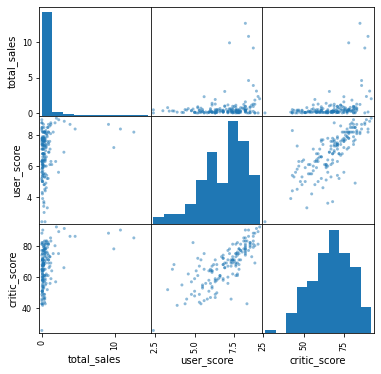

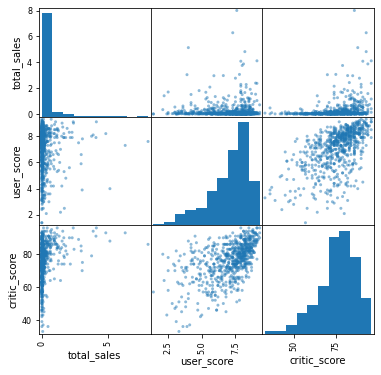

In [21]:
# создадим список наиболее прспективных платформ
perspective_platforms = ['XOne','WiiU','PS4','3DS','PC']

# pзададим цикл, который выведет таблицы корреляции
# и построит для них диаграммы рассеяния 
for i in perspective_platforms:
    print('Влияние отзывов на продажи, для платформы', i)
    display(dt_new.query('platform == @i')[['total_sales','user_score','critic_score']].corr())
    pd.plotting.scatter_matrix(dt_new.query(
        'platform == @i')[['total_sales','user_score','critic_score']], figsize=(6,6))

По коэффициенту корреляции Пирсона можно увидеть, что оценка критиков влияет на продажи по платформам "PS4", "Xone" и "3DS" - связь прямая умеренная. Оценка пользователей влияет только на платформу "WiiU". Но значительной же корреляции нет ни по одной платформе.

### Общее распределение игр по жанрам

In [22]:
# построим сводную таблицу с суммарными продажами по жанрам
dt_genre = (
    actual_platforms.pivot_table(
        index=['genre'],
        values='total_sales',
        aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
dt_genre

,genre,total_sales
0,Action,181.06
1,Shooter,158.77
2,Role-Playing,94.81
3,Sports,91.92
4,Misc,30.84
5,Racing,26.52
6,Fighting,25.33
7,Platform,17.33
8,Adventure,15.52
9,Simulation,12.74


По таблице видно, что жанр "Action" преобладает над остальными и является лидером в мире видеоигр, на втором месте с отставанием в почти в 200 млн. копий жанр "Shooter". К жанрам имеющим самые низкие продажи можно отнести "Puzzle" и "Strategy".

Но за высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Построим таблицы с медианными и средними продажами по жанрам.

In [23]:
# создадим сводную таблицу с медианными продажами по жанрам
dt_genre = (
    actual_platforms.pivot_table(
        index=['genre'],
        values='total_sales',
        aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
dt_genre

,genre,total_sales
0,Shooter,0.540
1,Sports,0.200
2,Platform,0.140
3,Fighting,0.120
4,Role-Playing,0.120
5,Simulation,0.100
6,Misc,0.100
7,Action,0.090
8,Racing,0.090
9,Strategy,0.055


In [24]:
# создадим сводную таблицу со средними продажами по жанрам
dt_genre = (
    actual_platforms.pivot_table(
        index=['genre'],
        values='total_sales',
        aggfunc='mean')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
dt_genre

,genre,total_sales
0,Shooter,1.392719
1,Sports,0.723780
2,Fighting,0.589070
3,Platform,0.495143
4,Role-Playing,0.491244
5,Racing,0.434754
6,Action,0.337799
7,Misc,0.317938
8,Simulation,0.303333
9,Puzzle,0.166923


При построении таблиц с медианными и средними продажами по жанрам, можно увидеть, что жанр "Action" уже не преобладает над остальными, это может быть обусловлено не стабильными продажами. Соответствнно к жанрам, где игры стабильно приносят высокий доход можно отнести "Shooter" и "Sports".

## Портрет пользователей разных регионов

### Самые популярные платформы (топ-5)

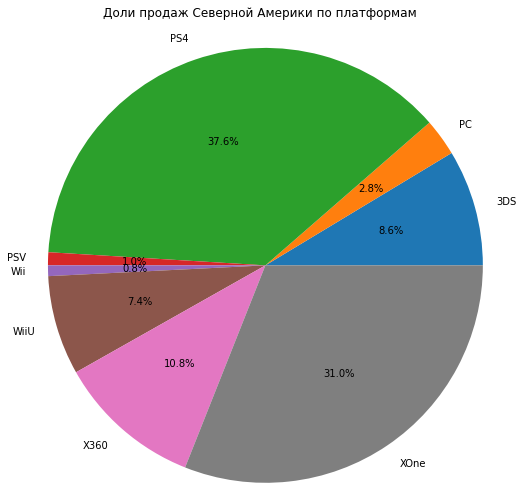

------------------------------------------------------------------
Топ 5 платформ Северной Америки:


,platform,na_sales
2,PS4,98.61
7,XOne,81.27
6,X360,28.30
0,3DS,22.64
5,WiiU,19.36


In [25]:
# определим топ 5 популярных платформ Северной Америки
dt_platform_na = actual_platforms.pivot_table(index='platform', values='na_sales',aggfunc='sum')
dt_platform_na = dt_platform_na.reset_index()
dt_platform_na['na_sales'] = dt_platform_na['na_sales'].astype(float)
plt.suptitle('Доли продаж Северной Америки по платформам', y=1.4)
plt.pie(
    dt_platform_na['na_sales'],
    labels=dt_platform_na['platform'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 платформ Северной Америки:')
display(dt_platform_na.sort_values(by='na_sales', ascending=False).head())

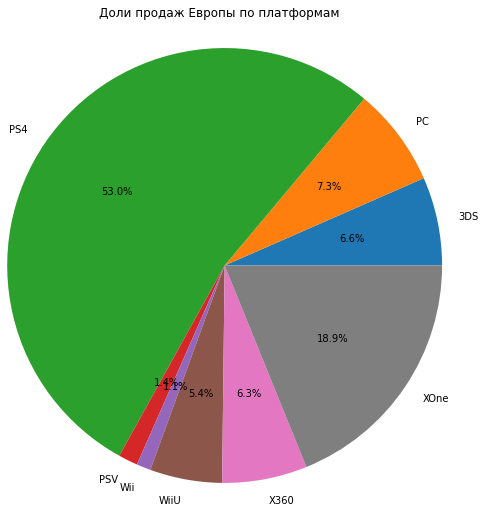

------------------------------------------------------------------
Топ 5 платформ Европы:


,platform,eu_sales
2,PS4,130.04
7,XOne,46.25
1,PC,17.97
0,3DS,16.12
6,X360,15.49


In [26]:
# определим топ 5 популярных платформ Европы
dt_platform_eu = actual_platforms.pivot_table(index='platform', values='eu_sales',aggfunc='sum')
dt_platform_eu = dt_platform_eu.reset_index()
dt_platform_eu['eu_sales'] = dt_platform_eu['eu_sales'].astype(float)
plt.suptitle('Доли продаж Европы по платформам', y=1.4)
plt.pie(
    dt_platform_eu['eu_sales'],
    labels=dt_platform_eu['platform'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 платформ Европы:')
display(dt_platform_eu.sort_values(by='eu_sales', ascending=False).head())

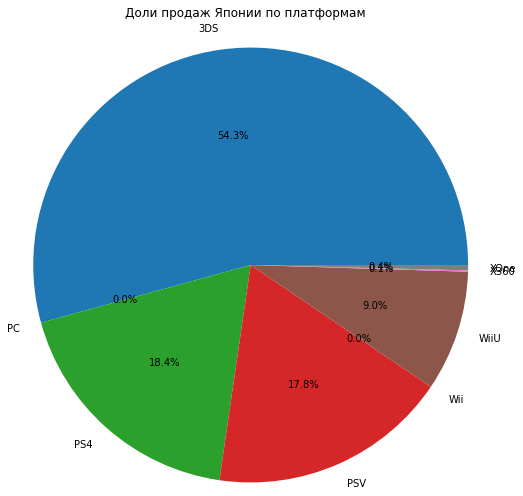

------------------------------------------------------------------
Топ 5 платформ Японии:


,platform,jp_sales
0,3DS,44.24
2,PS4,15.02
3,PSV,14.54
5,WiiU,7.31
7,XOne,0.32


In [27]:
# определим топ 5 популярных платформ Японии
dt_platform_jp = actual_platforms.pivot_table(index='platform', values='jp_sales',aggfunc='sum')
dt_platform_jp = dt_platform_jp.reset_index()
dt_platform_jp['jp_sales'] = dt_platform_jp['jp_sales'].astype(float)
plt.suptitle('Доли продаж Японии по платформам', y=1.4)
plt.pie(
    dt_platform_jp['jp_sales'],
    labels=dt_platform_jp['platform'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 платформ Японии:')
display(dt_platform_jp.sort_values(by='jp_sales', ascending=False).head())

По круговым диаграммам, с распределением по долям продаж различных платформ в каждом регионе, можно сделать следующие выводы:
- на рынке Северной Америки, за актуальный период, 37.6% приходится на платформу "PS4" - 98.61 млн. копий, 41.8% на компанию Microsoft и ее платформ "XOne" - 81.27 млн. копий (31.0%) и "X360" - 28.30 млн. копий (10.8%);
- по диаграмме для Европейского рынка также видно преобладание "PS4" - 130.04 млн. копий (53.0%), на 2 месте по продажам платформа "XOne" - 46.25 млн. копий (18.9%), на 3 месте игры платформа "PC" - 17.97 млн. копий (7.3%);
- Япония, отличается высоким спросом на игровые платформы относящиеся к портативным. Лидером продаж в данном регионе является платформа "3DS" - 44.24 млн. копий (54.3%), на втором месте платформа-лидер других исследуемых регионов - "PS4" - 15.02 млн. копий (18.4%), а на третьем месте снова портативная платформа - "PSV"  с показателем доли 17.8% (14.54 млн. копий).

### Самые популярные жанры (топ-5)

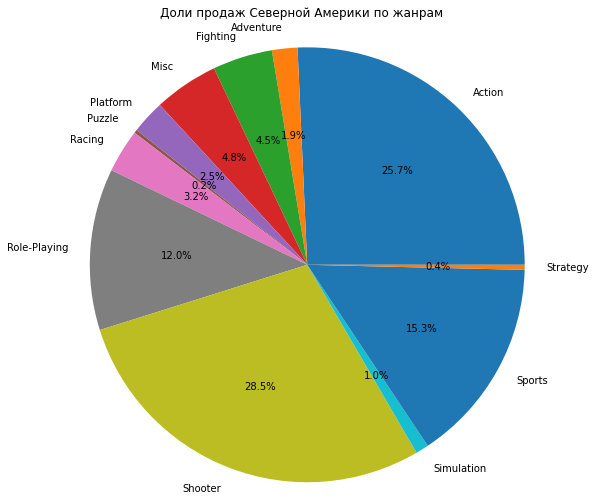

------------------------------------------------------------------
Топ 5 жанров Северной Америки:


,genre,na_sales
8,Shooter,74.76
0,Action,67.37
10,Sports,40.04
7,Role-Playing,31.46
3,Misc,12.58


In [28]:
# определим топ 5 популярных жанров Северной Америки
dt_genre_na = actual_platforms.pivot_table(index='genre', values='na_sales',aggfunc='sum')
dt_genre_na = dt_genre_na.reset_index()
dt_genre_na['na_sales'] = dt_genre_na['na_sales'].astype(float)
plt.suptitle('Доли продаж Северной Америки по жанрам', y=1.4)
plt.pie(
    dt_genre_na['na_sales'],
    labels=dt_genre_na['genre'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 жанров Северной Америки:')
display(dt_genre_na.sort_values(by='na_sales', ascending=False).head())

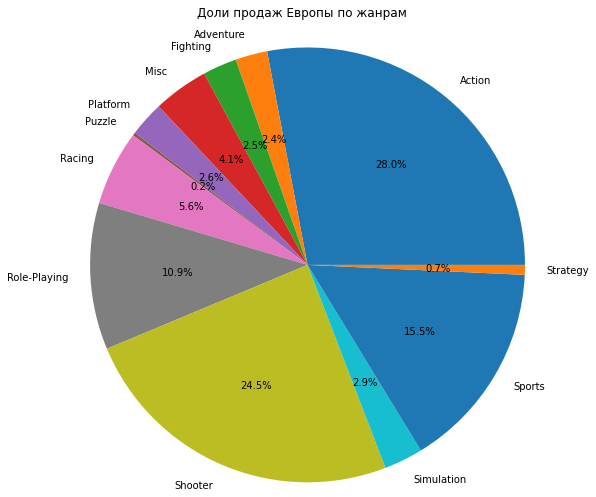

------------------------------------------------------------------
Топ 5 жанров Европы:


,genre,eu_sales
0,Action,68.59
8,Shooter,60.14
10,Sports,38.10
7,Role-Playing,26.71
6,Racing,13.67


In [29]:
# определим топ 5 популярных жанров Европы
dt_genre_eu = actual_platforms.pivot_table(index='genre', values='eu_sales',aggfunc='sum')
dt_genre_eu = dt_genre_eu.reset_index()
dt_genre_eu['eu_sales'] = dt_genre_eu['eu_sales'].astype(float)
plt.suptitle('Доли продаж Европы по жанрам', y=1.4)
plt.pie(
    dt_genre_eu['eu_sales'],
    labels=dt_genre_eu['genre'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 жанров Европы:')
display(dt_genre_eu.sort_values(by='eu_sales', ascending=False).head())

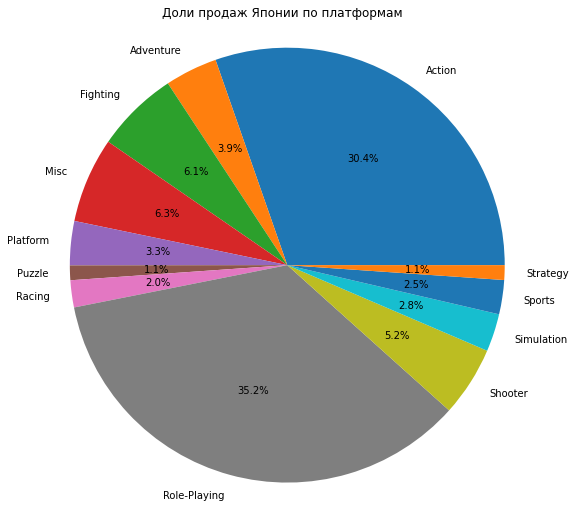

------------------------------------------------------------------
Топ 5 жанров Японии:


,genre,jp_sales
7,Role-Playing,28.72
0,Action,24.74
3,Misc,5.17
2,Fighting,5.01
8,Shooter,4.24


In [30]:
# определим топ 5 популярных жанров Японии
dt_genre_jp = actual_platforms.pivot_table(index='genre', values='jp_sales',aggfunc='sum')
dt_genre_jp = dt_genre_jp.reset_index()
dt_genre_jp['jp_sales'] = dt_genre_jp['jp_sales'].astype(float)
plt.suptitle('Доли продаж Японии по платформам', y=1.4)
plt.pie(
    dt_genre_jp['jp_sales'],
    labels=dt_genre_jp['genre'],
    autopct="%1.1f%%",
    radius=2.5,
    center=(0,2)
)
plt.show()

print('------------------------------------------------------------------')
print('Топ 5 жанров Японии:')
display(dt_genre_jp.sort_values(by='jp_sales', ascending=False).head())

По круговым диаграммам, с распределением по долям продаж в различных игровых жанрах, можно сделать следующие выводы:
- для рынков Северной Америки и Европы тройка лидеров одинкова: "Action", "Shooter" и "Sports";
- в ишровых жанрах Япония также отличилась, 32.8% приходится на жанр "Role-Playing" (57.47 млн. копий), на 2 месте по продажам "Action" - 40.06 млн. копий (22.9%)

### Влияние рейтинга ESRB на продажи

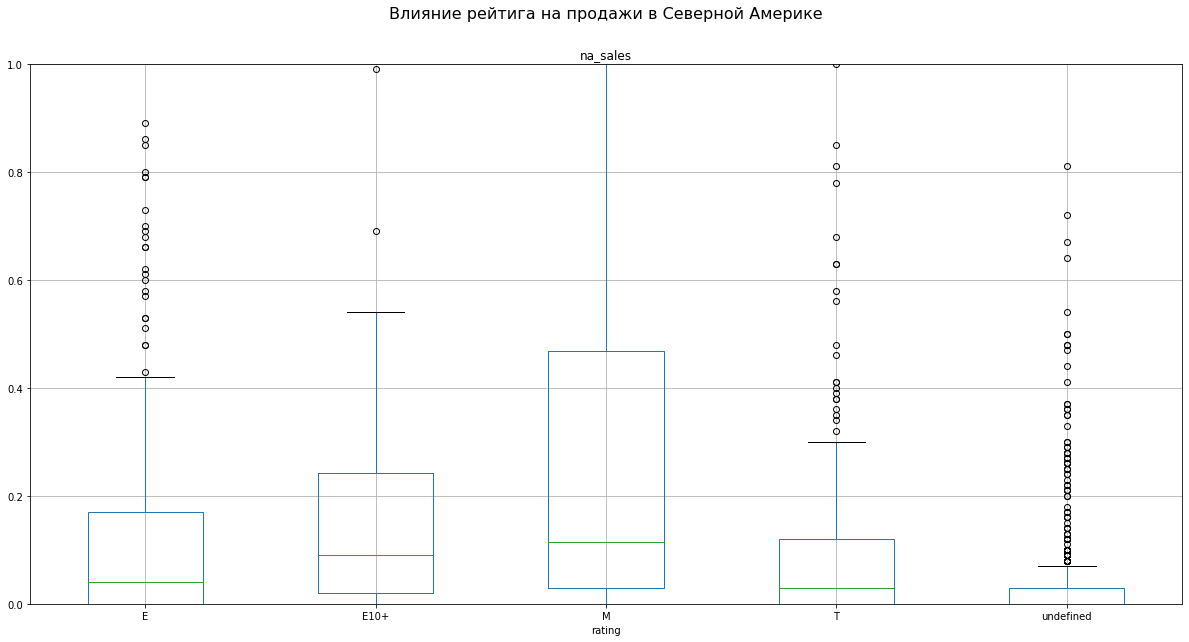

In [31]:
# определим влияние рейтига на продажи в Северной Америке
actual_platforms.boxplot(column='na_sales', by='rating', figsize=(20,10))
plt.suptitle('Влияние рейтига на продажи в Северной Америке', size=16)
plt.ylim(0,1)
plt.show()

В доле продаж по Северной Америке наибольшее медианное значение по рейтингам "EC"(без возрастных ограничений) и "M"(для взрослых)

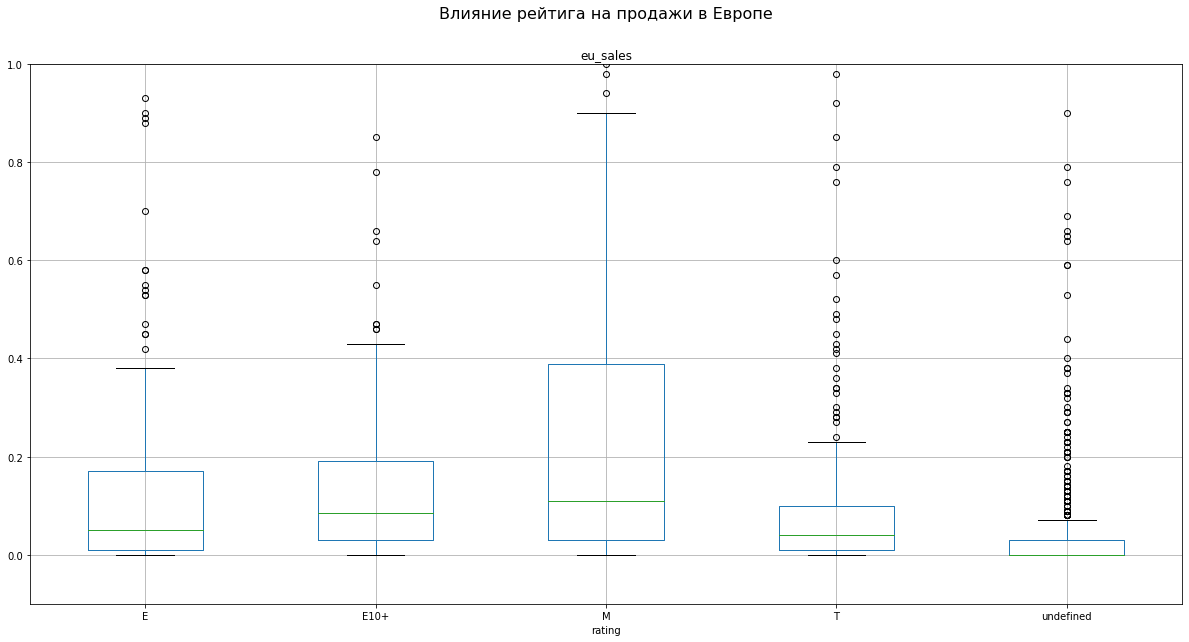

In [32]:
# определим влияние рейтига на продажи в Европе
actual_platforms.boxplot(column='eu_sales', by='rating', figsize=(20,10))
plt.suptitle('Влияние рейтига на продажи в Европе', size=16)
plt.ylim(-0.1,1)
plt.show()

В доле продаж по Европе наибольшее медианное значение по рейтингу "M"(для взрослых).

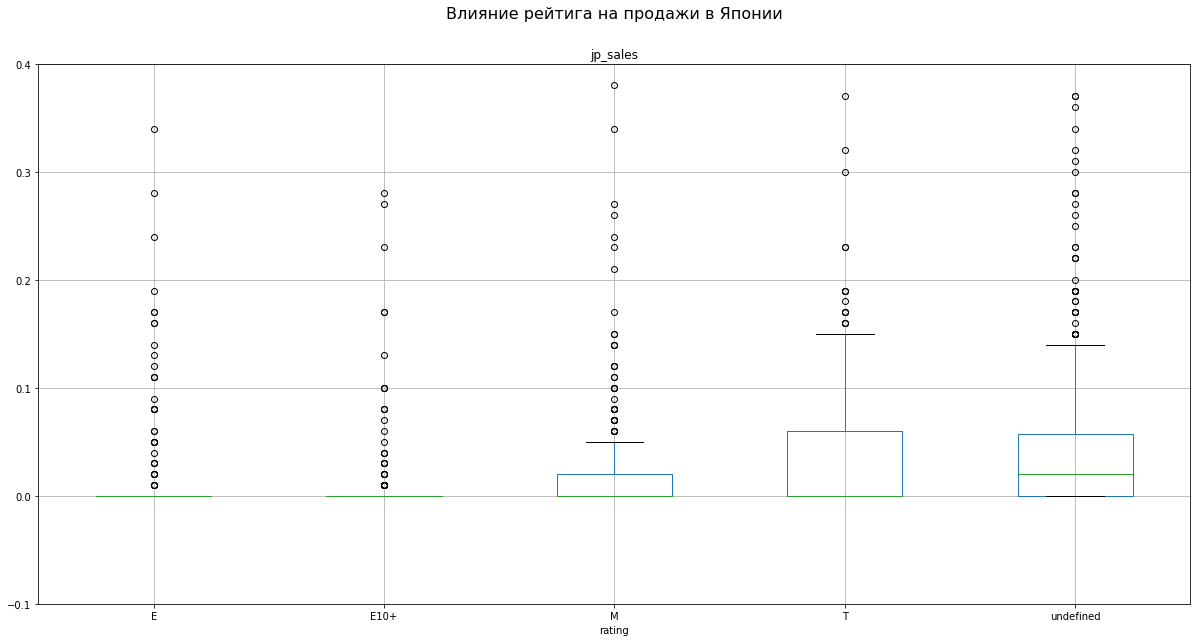

In [33]:
# определим влияние рейтига на продажи в Японии
actual_platforms.boxplot(column='jp_sales', by='rating', figsize=(20,10))
plt.suptitle('Влияние рейтига на продажи в Японии', size=16)
plt.ylim(-0.1,0.4)
plt.show()

Большенство медианных значений по возрастным ограничениям нулевые. Это можно объяснить тем, что большинство игр, вероятно, не выходили в Японии или плохо там продавались. Японский рынок всегда отличался от всех остальных.

## Проверка гипотез

Для проверки гепотез выбран метод `scipy.stats.ttest_ind()`. Данный метод позволяет проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезу:

- H₀ - средние пользовательские рейтинги платформ Xbox One и PC разные;
- H₁ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [34]:
# подготовим срезы для проверки гепотезы по необходимым платформам
# перед передачей в тест данные нужно почистить от пропусков
xone = actual_platforms.query('platform == "XOne"')
pc = actual_platforms.query('platform == "PC"')
xone = xone.dropna()
pc = pc.dropna()

In [35]:
# уровень стат. значимости
alpha = .05

results = st.ttest_ind(xone['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print()
print('Средний пользовательский рейтинг платформы XOne:', xone['user_score'].mean().round(2))
print('Средний пользовательский рейтинг платформы PC:', pc['user_score'].mean().round(2))

p-значение: 0.12817793652639856
Не отвергаем нулевую гипотезу

Средний пользовательский рейтинг платформы XOne: 6.62
Средний пользовательский рейтинг платформы PC: 6.34


### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезу:

- H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- H₁ - Средние пользовательские рейтинги жанров Action и Sports разные.

In [36]:
# подготовим срезы для проверки гепотезы по необходимым жанрам
# перед передачей в тест данные нужно почистить от пропусков
action = actual_platforms.query('genre == "Action"')
sports = actual_platforms.query('genre == "Sports"')
action = action.dropna()
sports = sports.dropna()

In [37]:
# уровень стат. значимости
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print()
print('Средний пользовательский рейтинг платформы XOne:', action['user_score'].mean().round(2))
print('Средний пользовательский рейтинг платформы PC:', sports['user_score'].mean().round(2))

p-значение: 8.959697002067591e-10
Отвергаем нулевую гипотезу

Средний пользовательский рейтинг платформы XOne: 6.85
Средний пользовательский рейтинг платформы PC: 5.71


## Вывод

Задача исследования: выявить определяющие успешность игры закономерности. При помощи полученного результата сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Из генеральной совокупности данных была сделана выборка, на основании средней продолжительности жизни платформ (7 лет).

На основании проведенного исследования можно сделать следующие выводы:
рекламную кампанию рекомендовано разверуть в пользу игровых платформ, не переживших 50% средней продолжительности жизненного цикла, это платформы:
- "XOne" и "PS4" для рынка Северной Америки и Европы. Также в данных регионах имеет смысл рекламировать платформу "PC", т.к. она является самой надежной и ее жизненный цикл не прерывался на протяжении всего исследуемого периода;
- "3DS" для рынка Японии. Для данного рынка стоит делать уклон именно на портативные игровые платформы.